## PROBLEM STATEMENT:
* Perform PCA
* Obtain optimum number of clusters and check whether we have obtained same number of clusters before & after PCA



## Import libraries

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn.cluster import KMeans

from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

## Read csv file

In [4]:
wine = pd.read_csv('wine.csv')
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Checking shape

In [5]:
wine.shape

(178, 14)

## Drop 'Type' Column as it already contain 3 types of data, which divides total dataset into 3 cluster from beginning

In [7]:
wine1 = wine.drop('Type', axis=1)

In [8]:
wine1.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Check shape of new dataset

In [9]:
wine1.shape

(178, 13)

## Check statistics of new dataset

In [10]:
wine1.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## Check Null Values

In [11]:
wine1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


## Check for duplicate rows

In [12]:
wine1[wine1.duplicated(keep = False)]

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


There are no duplicates in our dataset

## Check for outliers in the dataset using boxplot

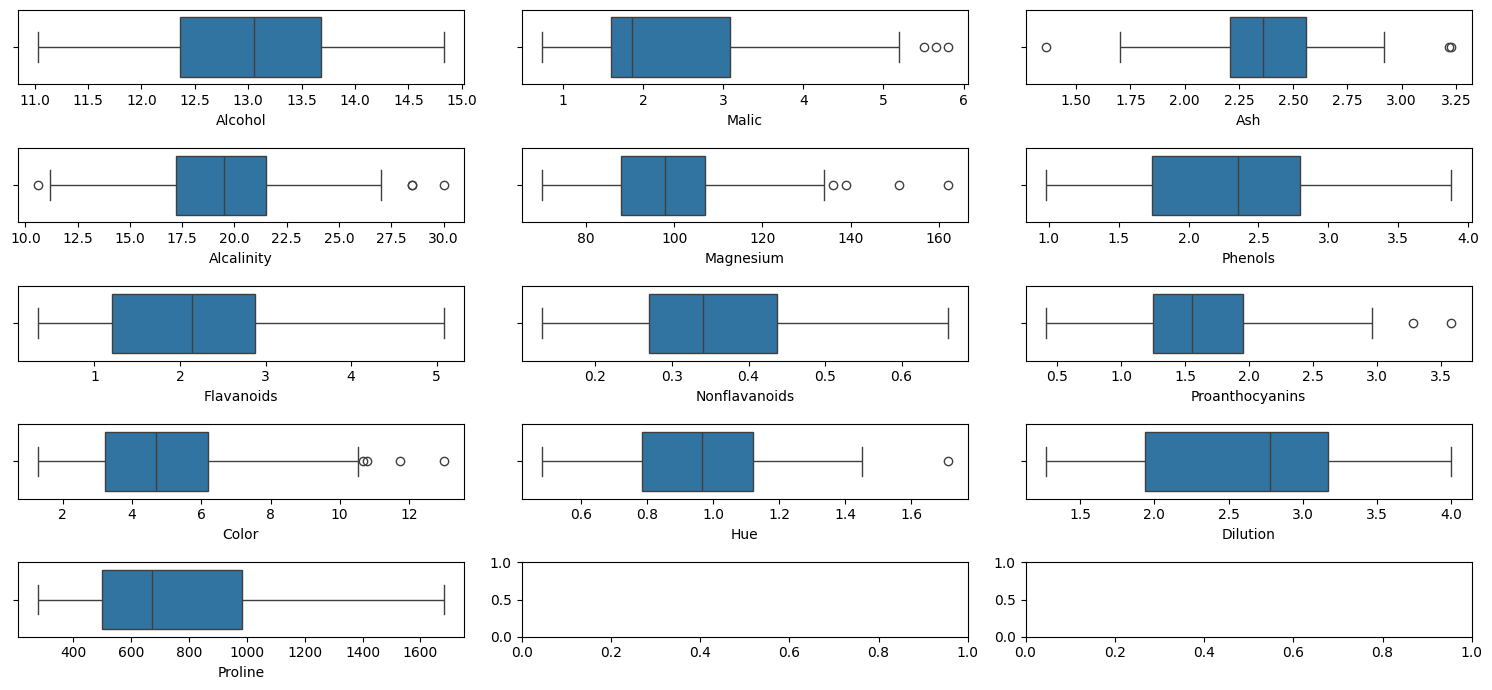

In [18]:
fig, ax = plt.subplots(5,3, figsize=(15,7))
sns.boxplot(wine1.Alcohol, ax=ax[0,0], orient='h')
sns.boxplot(wine1.Malic, ax=ax[0,1], orient='h')
sns.boxplot(wine1.Ash, ax=ax[0,2], orient='h')
sns.boxplot(wine1.Alcalinity, ax=ax[1,0], orient='h')
sns.boxplot(wine1.Magnesium, ax=ax[1,1], orient='h')
sns.boxplot(wine1.Phenols, ax=ax[1,2], orient='h')
sns.boxplot(wine1.Flavanoids, ax=ax[2,0], orient='h')
sns.boxplot(wine1.Nonflavanoids, ax=ax[2,1], orient='h')
sns.boxplot(wine1.Proanthocyanins, ax=ax[2,2], orient='h')
sns.boxplot(wine1.Color, ax=ax[3,0], orient='h')
sns.boxplot(wine1.Hue, ax=ax[3,1], orient='h')
sns.boxplot(wine1.Dilution, ax=ax[3,2], orient='h')
sns.boxplot(wine1.Proline, ax=ax[4,0], orient='h')
plt.tight_layout()
plt.show()

## Chek if the data is Normally distributed

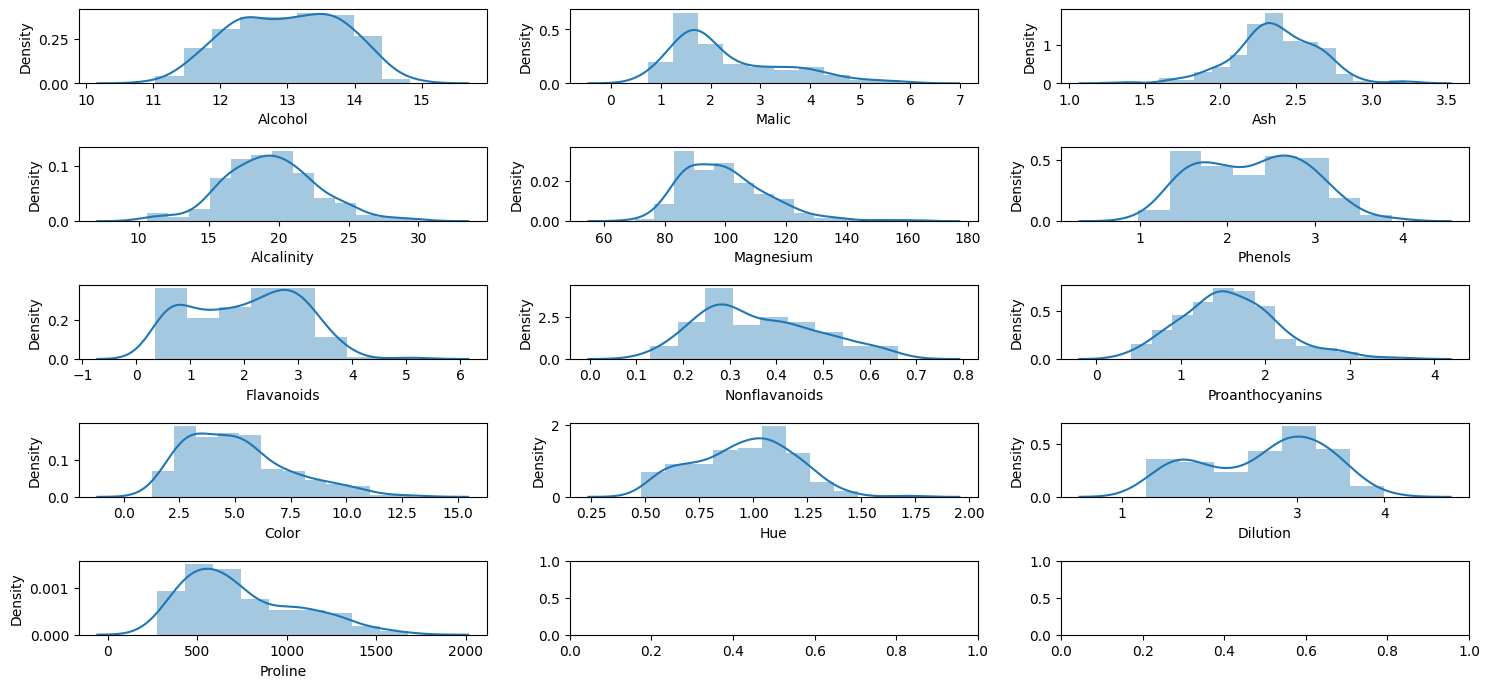

In [20]:
fig, ax = plt.subplots(5,3, figsize=(15,7))
sns.distplot(wine1.Alcohol, ax=ax[0,0])
sns.distplot(wine1.Malic, ax=ax[0,1])
sns.distplot(wine1.Ash, ax=ax[0,2])
sns.distplot(wine1.Alcalinity, ax=ax[1,0])
sns.distplot(wine1.Magnesium, ax=ax[1,1])
sns.distplot(wine1.Phenols, ax=ax[1,2])
sns.distplot(wine1.Flavanoids, ax=ax[2,0])
sns.distplot(wine1.Nonflavanoids, ax=ax[2,1])
sns.distplot(wine1.Proanthocyanins, ax=ax[2,2])
sns.distplot(wine1.Color, ax=ax[3,0])
sns.distplot(wine1.Hue, ax=ax[3,1])
sns.distplot(wine1.Dilution, ax=ax[3,2])
sns.distplot(wine1.Proline, ax=ax[4,0])
plt.tight_layout()
plt.show()

## Normalize the data, to avoid in data

In [22]:
wine1_normal = scale(wine1)

In [23]:
wine1_normal

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

## Apply K-Mean clusting without performing PCA

### Use Elbow Curve to find Optimal K value

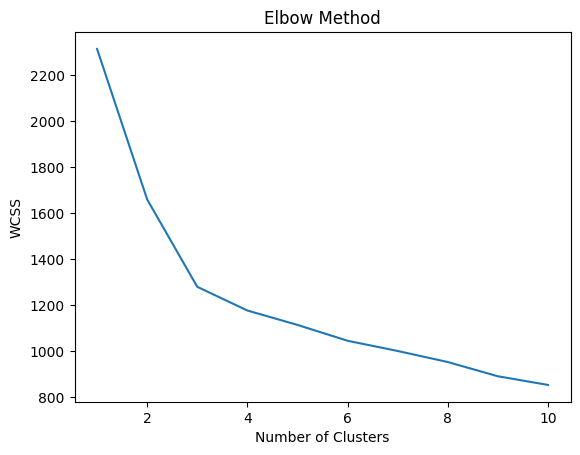

In [24]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, random_state=0)
  kmeans.fit(wine1_normal)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## Creating 3 clusters using K-means

In [26]:
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(wine1_normal)

KMeans(n_clusters=3, random_state=42)

## Create a variable with cluster labels for all categories

In [27]:
wine['cluster'] = clusters_new.labels_

In [28]:
clusters_new.cluster_centers_

array([[ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529],
       [-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618]])

## Grouping the clusters and checking the mean of all the clusters

In [29]:
wine.groupby('cluster').agg(['mean']).reset_index()

,cluster,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2.941176,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
1,1,1.048387,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806
2,2,2.000000,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231


## Checking the number of categories present in each KMean cluster

In [30]:
for i in range(3):
  print('cluster', i)
  print('Total Members: ', len(list(wine[wine['cluster']==i]['Type'].values)))
  print()

cluster 0
Total Members:  51

cluster 1
Total Members:  62

cluster 2
Total Members:  65



## Calculate the silhouette score

In [34]:
s_score = metrics.silhouette_score(wine1_normal, clusters_new.labels_).round(3)
s_score

0.285

# Now perform PCA on normalized data

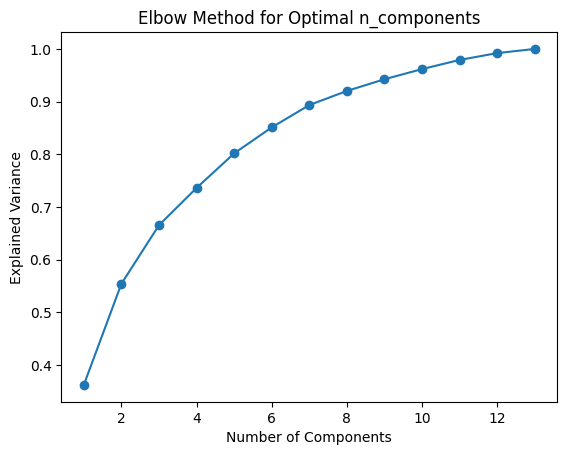

In [37]:
pca_scores = []
for n_components in range(1, 14):
  pca = PCA(n_components=n_components)
  pca_values = pca.fit_transform(wine1_normal)
  pca_scores.append(pca.explained_variance_ratio_.sum())

plt.plot(range(1, 14), pca_scores, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Elbow Method for Optimal n_components')
plt.show()



- The `n_components` parameter in PCA specifies the number of principal components to keep after dimensionality reduction. In the given code, `n_components` is set to 3, which means that the PCA algorithm will retain the 3 most significant principal components out of the original 13 features in the dataset.

- This parameter plays a crucial role in determining the trade-off between dimensionality reduction and information loss. Choosing a smaller number of components leads to greater dimensionality reduction but may result in losing important information. Conversely, choosing a larger number of components preserves more information but may not significantly improve the model's performance.

- The optimal choice for `n_components` depends on the specific dataset and the desired level of accuracy. It is common practice to use techniques such as the elbow method or scree plot to visualize the variance explained by each principal component and determine the point at which adding additional components does not provide a significant improvement in the model's performance.

# Find Best n_components value



- The optimal number of components can be identified by looking for the "elbow" in the plot, where the explained variance starts to level off.
- Based on the elbow plot, an optimal value for `n_components` would be **3**. - This is because there is a significant drop in the explained variance after the third component, indicating that the first three components capture most of the important information in the data.
- Choosing `n_components=3` would reduce the dimensionality of the data while retaining the most relevant information for further analysis or modeling.
- The term "level off" in the elbow curve means that the explained variance ratio stops increasing significantly as more principal components are added.
- This suggests that the additional components are not capturing much additional information from the data, and therefore, it is not worth retaining them.




In [38]:
pca = PCA(n_components=3)
pca_values = pca.fit_transform(wine1_normal)

In [ ]:
pca_values

# Make Clusters using 3 PC's

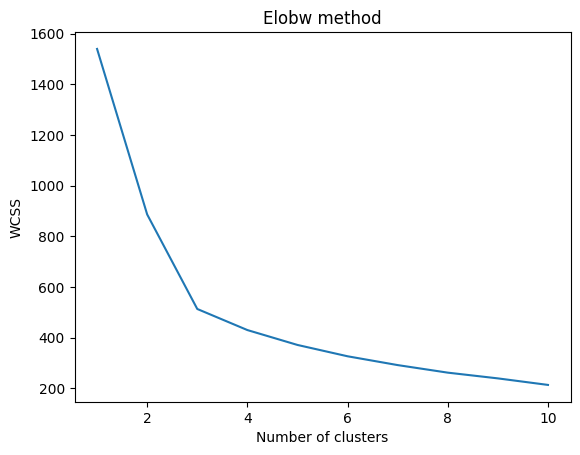

In [41]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, random_state=0)
  kmeans.fit(pca_values)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elobw method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

- From above Elbow plot, select Number of cluster, where WCSS starts decreasing rapidly
- In this case its 3

## Creating a K-Means Model with 3 clusters and fitting on the PCA data

In [44]:
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(pca_values)

KMeans(n_clusters=3, random_state=42)

In [46]:
wine['cluster'] = clusters_new.labels_

In [47]:
clusters_new.cluster_centers_

array([[-2.72003575e+00, -1.12565126e+00, -2.39093241e-01],
       [ 2.27619360e+00, -9.32054027e-01,  1.52803156e-03],
       [-3.69566084e-02,  1.77223945e+00,  1.86138728e-01]])

In [48]:
wine.groupby('cluster').agg(['mean']).reset_index()

,cluster,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2.941176,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
1,1,1.048387,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806
2,2,2.000000,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231


## View no. of wine categories in each cluster

In [49]:
for i in range(3):
  print('cluster', i)
  print('Total Members: ', len(list(wine[wine['cluster']==i]['Type'].values)))
  print()

cluster 0
Total Members:  51

cluster 1
Total Members:  62

cluster 2
Total Members:  65



## Now we will calculate silhouette score on pca clusters

In [50]:
s_score = metrics.silhouette_score(pca_values, clusters_new.labels_).round(3)
s_score

0.454

# Conclusion:
- Number of clusters are same before & after PCA.
- But, after performing PCA, we gain a double silhohuette score, which means that the complexity or overlaping of data is decreased after performing PCA.

